## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
import json
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
%ls

Mounted at /content/drive
drive/  sample_data/


In [ ]:
%cd drive/MyDrive/vdjdb

/content/drive/MyDrive/vdjdb


## Task 1: Get data columns
1.	Get the following columns: Gene, CDR3, V, J, MHC A, MHC B, MHC Class, Epitope, EPitope gene, Epitope species, Score (minimum 1 or more.)
2.	Limit data to: Human species, TRA, TRB, and Paired Only.
3.	Produce one table for Covid-19, one for Flu, and one for Cancer (we can combine them later if we want to).
4.	Remove or add meaningful placeholders to any rows that have empty values.


## 1.	Get the following columns: Gene, CDR3, V, J, MHC A, MHC B, MHC Class, Epitope, EPitope gene, Epitope species, Score (minimum 1 or more.)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/vdjdb/vdjdb.txt", delimiter="\t")
df.head(2)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no


In [ ]:
# Select the columns we need
selected_features = ["complex.id" ,'gene','cdr3','v.segm','j.segm','species','mhc.a','mhc.b','mhc.class','antigen.epitope','antigen.species','vdjdb.score']

df = df[selected_features]
df.head()

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.species,vdjdb.score
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2


In [ ]:
# df["mhc.b"].value_counts()
df[df["vdjdb.score"]>1].shape

(4085, 12)

In [ ]:
df.shape

(92771, 12)

In [ ]:
df["antigen.epitope"].value_counts()

KLGGALQAK     27948
GILGFVFTL     10024
NLVPMVATV      8004
AVFDRKSDAK     3546
RAKFKQLL       2756
              ...  
FGDDTVIEV         1
APSASAFFG         1
RPQGLSNNT         1
NPANNAAIV         1
DKDPNFKDQ         1
Name: antigen.epitope, Length: 1169, dtype: int64

## Balance the number of  epitopes

In [ ]:
# df2 = df1[df1["vdjdb.score"]>=1]
# df2.head()

df = df.copy()

# Frequency of rows for each epitope
freq_count = df["antigen.epitope"].value_counts()
# freq_count[freq_count<10000]
freq_count.reset_index().rename({
    "antigen.epitope": "number_of_datapoints",
    "index": "antigen.epitope"},axis = 1)

,antigen.epitope,number_of_datapoints
0,KLGGALQAK,27948
1,GILGFVFTL,10024
2,NLVPMVATV,8004
3,AVFDRKSDAK,3546
4,RAKFKQLL,2756
...,...,...
1164,FGDDTVIEV,1
1165,APSASAFFG,1
1166,RPQGLSNNT,1
1167,NPANNAAIV,1


In [ ]:
df = df[df["species"] == "HomoSapiens"]
freq_count = df["antigen.epitope"].value_counts()
df.shape


(85329, 12)

In [ ]:
df["antigen.epitope"].nunique()

1107

Function to provide an idea that how many epitopes should we keep based on datapoints.

In [ ]:
def print_num_epitopes(df , no_of_datapoints):

    freq_count = df["antigen.epitope"].value_counts()

    print(f"""Epitopes having less than {no_of_datapoints} datapoints:  {freq_count[freq_count<no_of_datapoints].shape[0]}""")

    print(f"""Epitopes having more than {no_of_datapoints} datapoints:  {df["antigen.epitope"].nunique() - freq_count[freq_count<no_of_datapoints].shape[0]}""")

In [ ]:
print_num_epitopes(df= df, no_of_datapoints = 100)

Epitopes having less than 100 datapoints:  1045
Epitopes having more than 100 datapoints:  62


In [ ]:
# freq_count = df3["antigen.epitope"].value_counts()

# N = 500

# antigen_epitopes = []
# for antigen_epitope in freq_count[freq_count>N].index:
#   antigen_epitope_df = df3[df3["antigen.epitope"] == antigen_epitope][:N]

#   antigen_epitopes.append(antigen_epitope_df)

# df3 = pd.concat(antigen_epitopes)
# df3["antigen.epitope"].value_counts()

In [ ]:
# df3 = df2.copy()
# df3.shape

## 2.	Limit data to: Human species, TRA, TRB, and Paired Only.

In [ ]:
# df3 = df2.copy()
# df3.shape

In [ ]:
# df3 = df3[df3["species"] == "HomoSapiens"]
# df3.shape

## 3.	Produce one table for Covid-19, one for Flu, and one for Cancer. (we can combine them later if we want to).



**Flu (Influenza):**
- Influenza A

**COVID-19 (SARS-CoV-2):**
- SARS-CoV-2

**Cancer:**

1. *EBV (Epstein-Barr Virus)*: Associated with several types of cancer, including Hodgkin's lymphoma, Burkitt's lymphoma, gastric cancer, and nasopharyngeal carcinoma.
2. *HTLV-1 (Human T-cell Lymphotropic Virus Type 1)*: Associated with adult T-cell leukemia/lymphoma (ATLL).
3. *HCV (Hepatitis C Virus)*: Chronic infection can lead to liver cancer, specifically hepatocellular carcinoma.
4. *HPV (Human Papillomavirus)*: Certain types of HPV are strongly associated with cervical cancer, as well as other types of cancer including anal, oropharyngeal, penile, vulvar, and vaginal cancers.
5. *HHV (Human Herpesvirus)*: Depending on the specific type, some HHVs can be associated with cancer. For example, HHV-8 is associated with Kaposi's sarcoma.
6. *MCPyV (Merkel Cell Polyomavirus)*: Linked to Merkel cell carcinoma, a rare but aggressive form of skin cancer.


In [ ]:
species_dict = {
    'Flu': ['InfluenzaA'],
    'COVID-19': ['SARS-CoV-2'],
    'Cancer': ['EBV', 'HTLV-1', "HCV", 'MCPyV', 'HPV-16']
}


In [ ]:
flu_data = df[df["antigen.species"]=='InfluenzaA']
flu_data.head()

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.species,vdjdb.score
1273,107,TRA,CAVSESPFGNEKLTF,TRAV8-4*01,TRAJ48*01,HomoSapiens,HLA-DRA*01:02:03,HLA-DRB1*01:01:01,MHCII,PKYVKQNTLKLAT,InfluenzaA,3
1274,107,TRB,CASSSTGLPYGYTF,TRBV28*01,TRBJ1-2*01,HomoSapiens,HLA-DRA*01:02:03,HLA-DRB1*01:01:01,MHCII,PKYVKQNTLKLAT,InfluenzaA,3
1277,109,TRA,CAVSESPFGNEKLTF,TRAV8-4*01,TRAJ48*01,HomoSapiens,HLA-DRA*01:02:03,HLA-DRB1*04:01:01,MHCII,PKYVKQNTLKLAT,InfluenzaA,3
1278,109,TRB,CASSSTGLPYGYTF,TRBV28*01,TRBJ1-2*01,HomoSapiens,HLA-DRA*01:02:03,HLA-DRB1*04:01:01,MHCII,PKYVKQNTLKLAT,InfluenzaA,3
1287,114,TRA,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,HomoSapiens,HLA-A*02:01:48,B2M,MHCI,GILGFVFTL,InfluenzaA,3


In [ ]:
covid19_data = df[df["antigen.species"]=='SARS-CoV-2']
covid19_data.head()

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.species,vdjdb.score
419,0,TRB,CASSQTTKDEQYF,TRBV4-2*01,TRBJ2-7*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,KTFPPTEPK,SARS-CoV-2,1
420,0,TRB,CASSQGQKDEQYF,TRBV4-2*01,TRBJ2-7*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,KTFPPTEPK,SARS-CoV-2,1
421,0,TRB,CASSQFTGRKEKLFF,TRBV16*01,TRBJ1-4*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,KTFPPTEPK,SARS-CoV-2,1
422,0,TRB,CASSLTSGGPTSDTQYF,TRBV5-1*01,TRBJ2-3*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,LLYDANYFL,SARS-CoV-2,1
423,0,TRB,CASTTPVTERYNEQFF,TRBV28*01,TRBJ2-1*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,LLYDANYFL,SARS-CoV-2,1


In [ ]:
# ['EBV', 'HTLV-1', "HCV", 'MCPyV', 'HPV-16']

cancer_data = df[(
    df["antigen.species"]=='EBV') |
    (df["antigen.species"]=='HTLV-1') |
    (df["antigen.species"]=='HCV') |
    (df["antigen.species"]=='MCPyV') |
    (df["antigen.species"]=='HPV-16')
]
cancer_data.sample(5)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.species,vdjdb.score
23757,2111,TRB,CASSPPTERRSEAFF,TRBV6-2*01,TRBJ1-1*01,HomoSapiens,HLA-A*08:01,B2M,MHCI,HPVTKYIM,HCV,0
17508,1154,TRB,CASSYLGDIQFNQPQHF,TRBV6-2*01,TRBJ1-5*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,CINGVCWTV,HCV,0
30661,4850,TRB,CASSTTAGDTEAFF,TRBV6-6*01,TRBJ1-1*01,HomoSapiens,HLA-B*08:01,B2M,MHCI,RAKFKQLL,EBV,0
17679,0,TRB,CSAPEVRGVWGYTF,TRBV20-1*01,TRBJ1-2*01,HomoSapiens,HLA-B*35:01,B2M,MHCI,YPLHEQHGM,EBV,1
18708,0,TRB,CASSEIARPRAFF,TRBV4-1*01,TRBJ1-1*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,GLCTLVAML,EBV,0


## 4.	Remove or add meaningful placeholders to any rows that have empty values.

Assigning random values for imputing missing data was not considered, due sensitive medical information within the dataset. Therefore, null values are replaced with the term "missing."

In [ ]:
df = df.fillna("missing")

In [ ]:
df.isnull().sum()

complex.id         0
gene               0
cdr3               0
v.segm             0
j.segm             0
species            0
mhc.a              0
mhc.b              0
mhc.class          0
antigen.epitope    0
antigen.species    0
vdjdb.score        0
dtype: int64

In [ ]:
# list(df.groupby("complex.id")["mhc.a"])

In [ ]:
# del df1,df2,df3,df4
df[df["complex.id"] != 0]["mhc.a"].nunique()

90

## Distance Matrix

In [ ]:
!pip install umap-learn -q
!pip install umap-learn[plot] -q

In [ ]:


%pip install git+https://github.com/kmayerb/tcrdist3.git@0.2.2 -q

  Preparing metadata (setup.py) ... done


In [ ]:
df_without_0_id = df[df["complex.id"] != 0]
df_sample = pd.concat([
    df_without_0_id[df_without_0_id["gene"] == "TRA"].sample(10000),
    df_without_0_id[df_without_0_id["gene"] == "TRB"].sample(10000)
])
df_sample.head()
# distance_matrix[distance_matrix[gene].isin(top_10_value_counts.index)]

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.species,vdjdb.score
54092,16566,TRA,CAGQSGRVGGSQGNLIF,TRAV35*01,TRAJ42*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,KLGGALQAK,CMV,0
54064,16552,TRA,CAFMTNMEYGNKLVF,TRAV38-1*01,TRAJ47*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,KLGGALQAK,CMV,0
65350,22195,TRA,CAIGPGNMLTF,TRAV12-3*01,TRAJ39*01,HomoSapiens,HLA-A*11:01,B2M,MHCI,AVFDRKSDAK,EBV,0
85656,28223,TRA,CAYHDNARLMF,TRAV38-2/DV8*01,TRAJ31*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,KLWAQCVQL,SARS-CoV-2,0
50826,14933,TRA,CALSGGYNKLIF,TRAV6*01,TRAJ4*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,KLGGALQAK,CMV,0


In [ ]:
# df[100:120]

## Non Paired distance matrices

In [ ]:
import os
from tcrdist.repertoire import TCRrep
import umap
import umap.plot
import matplotlib.pyplot as plt

def calculate_dist_and_umap(df, chain, gene):
  tr = TCRrep(cell_df = df,
            organism = 'human',
            chains = [chain],
            db_file = 'alphabeta_gammadelta_db.tsv')

  if chain == 'beta':
    distance_matrix = pd.concat([tr.clone_df["complex.id"], pd.DataFrame(tr.pw_cdr3_b_aa), tr.clone_df[gene]], axis = 1)
  elif chain  == "alpha":
    distance_matrix = pd.concat([tr.clone_df["complex.id"], pd.DataFrame(tr.pw_cdr3_a_aa), tr.clone_df[gene]], axis = 1)


  value_counts_antigen = distance_matrix[gene].value_counts()
  top_10_value_counts = value_counts_antigen.nlargest(10)
  distance_matrix_filtered = distance_matrix[distance_matrix[gene].isin(top_10_value_counts.index)]

  distances_reduced = umap.UMAP(n_components = 2, n_neighbors = 100).fit(distance_matrix_filtered.iloc[:, 1:-1].values)

  output_dir = 'visualisations'

  f = umap.plot.points(distances_reduced, labels=distance_matrix_filtered[gene])
  f.set_xlabel('UMAP Dimension 1', fontsize=10)
  f.set_ylabel('UMAP Dimension 2', fontsize=10)
  f.set_title(f'UMAP Visualization of {chain}', fontsize=12)

  # Save the figure
  if not os.path.exists(output_dir):
    os.makedirs(output_dir)

  f.get_figure().savefig(f'{output_dir}/{chain}_chain_umap.png')
  return distance_matrix


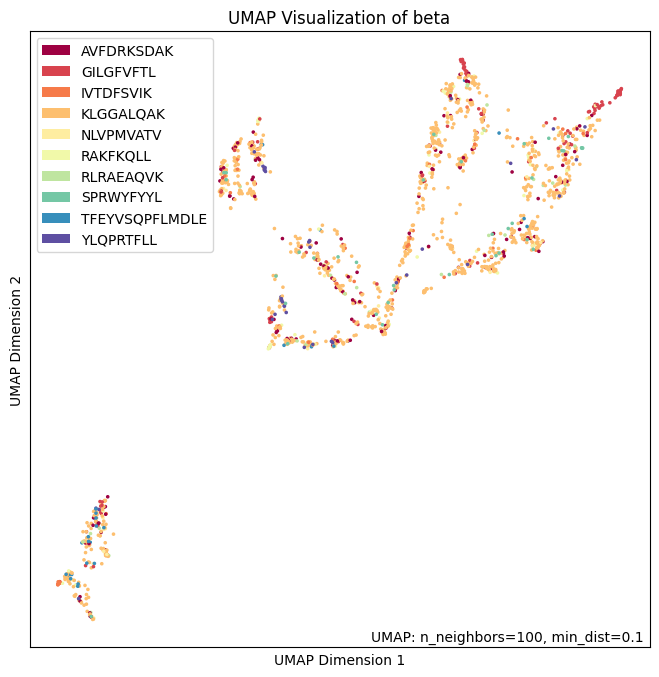

In [ ]:
# get beta chains only
TRB = df_sample[df_sample['gene'] =='TRB']
# rename the columns for our beta chain matrix calculation
beta_chains = TRB[['complex.id', 'cdr3', 'v.segm', 'j.segm', 'antigen.epitope']]
beta_chains.rename(columns={'cdr3':'cdr3_b_aa','v.segm':'v_b_gene', 'j.segm':'j_b_gene'}, inplace=True)
beta_chains
beta_dist_matrix = calculate_dist_and_umap(beta_chains.sample(frac = 0.2), 'beta', 'antigen.epitope')


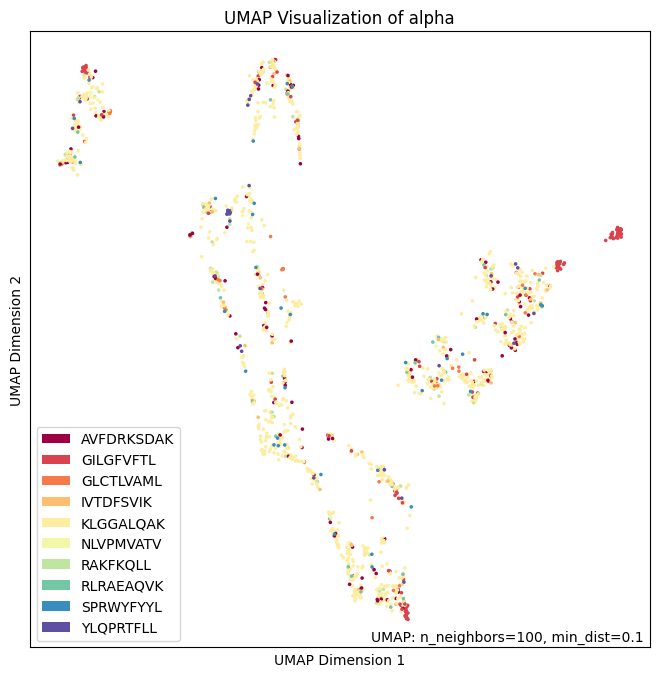

In [ ]:
# get alpha chains only
TRA = df_sample[df_sample['gene'] =='TRA']
# rename the columns for our alpha chain matrix calculation
alpha_chains = TRB[['complex.id','cdr3', 'v.segm', 'j.segm', 'antigen.epitope']]
alpha_chains.rename(columns={'cdr3':'cdr3_a_aa','v.segm':'v_a_gene', 'j.segm':'j_a_gene'}, inplace=True)
alpha_chains

alpha_dist_matrix = calculate_dist_and_umap(alpha_chains.sample(frac = 0.2), 'alpha', 'antigen.epitope')

In [ ]:
alpha_dist_matrix.head()

,complex.id,0,1,2,3,4,5,6,7,8,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,antigen.epitope
0,11,0,53,48,52,56,48,48,40,52,...,51,43,57,52,48,48,47,44,54,FLKEMGGL
1,19,53,0,28,18,32,16,36,22,22,...,28,48,32,23,30,24,28,28,28,ELAGIGILTV
2,22,48,28,0,24,20,31,27,22,23,...,28,39,27,27,31,16,23,28,25,ELAGIGILTV
3,32,52,18,24,0,30,15,36,28,24,...,25,47,30,31,34,26,35,36,27,ELAGIGILTV
4,36,56,32,20,30,0,32,39,22,26,...,32,44,23,27,32,20,28,31,36,ELAGIGILTV


## Paired alpha beta chains

In [ ]:
list_to_combine = []
checked_ids = []
def process_row(row, df = df):
    # check the complex id not already checked
    if row['complex.id'] not in checked_ids:
        # find matching rows
        matched_rows = df[df['complex.id'] == row['complex.id']]
        # should be two (some rows have only 1 match)
        if len(matched_rows) == 2:
            # get the tcra row
            tra_row = matched_rows.iloc[0]
            # get the tcrb row
            trb_row = matched_rows.iloc[1]
            # add to list as a combined row
            list_to_combine.append({
                                    'complex.id':tra_row['complex.id'],
                                    'cdr3_a_aa': tra_row['cdr3'], 'cdr3_b_aa': trb_row['cdr3'],
                                    'v_b_gene' :trb_row['v.segm'],
                                    'j_b_gene':trb_row['j.segm'],
                                    'v_a_gene':tra_row['v.segm'],
                                    'j_a_gene':tra_row['j.segm'],
                                    "mhc.a" : tra_row["mhc.a"],
                                    "mhc.b" : tra_row["mhc.b"],
                                    "antigen.species" : tra_row["antigen.species"],
                                    'antigen.epitope': tra_row['antigen.epitope']
                                   })
            # we've checked this id now, so we need to make sure we don't have to check it again.
            checked_ids.append(row['complex.id'])
df.apply(process_row, axis=1)
paired = pd.DataFrame(list_to_combine)
paired.head()

,complex.id,cdr3_a_aa,cdr3_b_aa,v_b_gene,j_b_gene,v_a_gene,j_a_gene,mhc.a,mhc.b,antigen.species,antigen.epitope
0,1,CIVRAPGRADMRF,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,TRAV26-1*01,TRAJ43*01,HLA-B*08,B2M,HIV-1,FLKEKGGL
1,2,CAVPSGAGSYQLTF,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,TRAV20*01,TRAJ28*01,HLA-B*08,B2M,HIV-1,FLKEKGGL
2,3,CAVKASGSRLT,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,TRAV2*01,missing,HLA-B*08,B2M,HIV-1,FLKEKGGL
3,4,CAYRPPGTYKYIF,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,TRAV38-2/DV8*01,TRAJ40*01,HLA-B*08,B2M,HIV-1,FLKEKGGL
4,5,CIVRAPGRADMRF,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,TRAV26-1*01,TRAJ43*01,HLA-B*08,B2M,HIV-1,FLKEQGGL


In [ ]:
# paired["antigen.epitope"].value_counts()
paired.columns


Index(['complex.id', 'cdr3_a_aa', 'cdr3_b_aa', 'v_b_gene', 'j_b_gene',
       'v_a_gene', 'j_a_gene', 'mhc.a', 'mhc.b', 'antigen.species',
       'antigen.epitope'],
      dtype='object')

In [ ]:
def calculate_paired_dist_and_umap(df, chain, gene):
  df = df[['complex.id', 'cdr3_a_aa', 'cdr3_b_aa', 'v_b_gene', 'j_b_gene', 'v_a_gene', 'j_a_gene','antigen.epitope']]
  tr = TCRrep(cell_df = df,
            organism = 'human',
            chains = ["alpha", "beta"],
            db_file = 'alphabeta_gammadelta_db.tsv')

  if chain == 'beta':
    distance_matrix = pd.concat([tr.clone_df["complex.id"], pd.DataFrame(tr.pw_cdr3_b_aa), tr.clone_df[gene]], axis = 1)
  elif chain  == "alpha":
    distance_matrix = pd.concat([tr.clone_df["complex.id"], pd.DataFrame(tr.pw_cdr3_a_aa), tr.clone_df[gene]], axis = 1)


  value_counts_antigen = distance_matrix[gene].value_counts()
  top_10_value_counts = value_counts_antigen.nlargest(10)
  distance_matrix_filtered = distance_matrix[distance_matrix[gene].isin(top_10_value_counts.index)]

  distances_reduced = umap.UMAP(n_components = 2, n_neighbors = 100).fit(distance_matrix_filtered.iloc[:, 1:-1].values)

  output_dir = 'visualisations'

  f = umap.plot.points(distances_reduced, labels=distance_matrix_filtered[gene])
  f.set_xlabel('UMAP Dimension 1', fontsize=10)
  f.set_ylabel('UMAP Dimension 2', fontsize=10)
  f.set_title(f'UMAP Visualization of paired {chain}', fontsize=12)

  # Save the figure
  if not os.path.exists(output_dir):
    os.makedirs(output_dir)

  f.get_figure().savefig(f'{output_dir}/paired_{chain}_chain_umap.png')
  return distance_matrix

## Getting a Paired TRA & TRB DataFrame

In [ ]:
# paired.to_csv("paired.csv", index = False)
%ls

In [ ]:
# The aim is to balance the dataset, as the frequency of epitopes varies significantly.
# The following function, identifes the number of epitopes, under a particular threshhold.
# For example, the function identifies 11 epitopes with more 400 data points.
# Therefore the optimum number of datapoints is decided by trial and error.
# Reducing the number of datapoints improves the chance of identifying additional epitopes.

In [ ]:
print_num_epitopes(paired, 400)
# paired

Epitopes having less than 400 datapoints:  902
Epitopes having more than 400 datapoints:  11


In [ ]:
def filter_data(N, df):

    freq_count = df["antigen.epitope"].value_counts()
    antigen_epitopes = []
    for antigen_epitope in freq_count[freq_count>N].index:
      antigen_epitope_df = df[df["antigen.epitope"] == antigen_epitope][:N]

      antigen_epitopes.append(antigen_epitope_df)

    df = pd.concat(antigen_epitopes)
    return df

paired_balance = filter_data(400, paired)
paired_balance.shape
# df3["antigen.epitope"].value_counts()

(4400, 11)

In [ ]:
paired_balance["antigen.epitope"].value_counts()

KLGGALQAK         400
GILGFVFTL         400
AVFDRKSDAK        400
RAKFKQLL          400
IVTDFSVIK         400
NLVPMVATV         400
YLQPRTFLL         400
RLRAEAQVK         400
SPRWYFYYL         400
TFEYVSQPFLMDLE    400
ELAGIGILTV        400
Name: antigen.epitope, dtype: int64

In [ ]:
# paired_sample = paired.sample(frac = 0.3)
# paired_sample.head()

**Produce paired beta chain distance matrix**


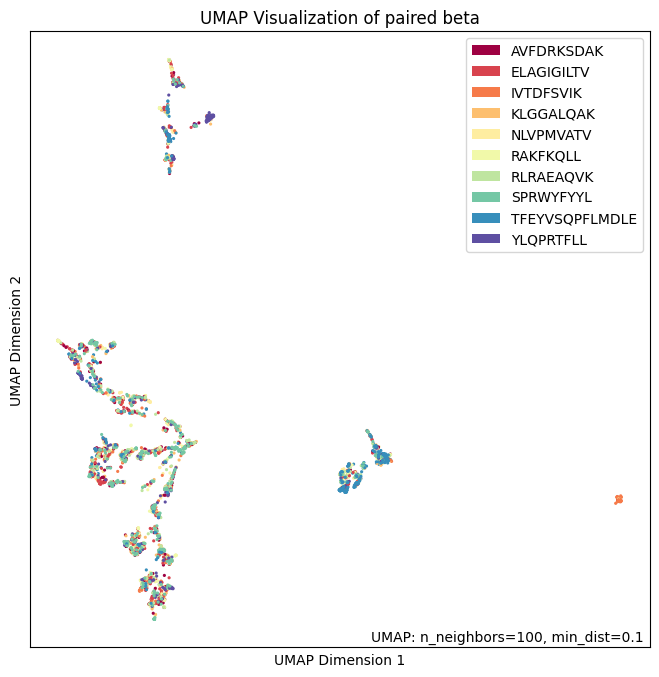

In [ ]:
paired_dist_matrix_beta = calculate_paired_dist_and_umap(df = paired_balance, chain = "beta", gene = "antigen.epitope")

In [ ]:
paired_dist_matrix_beta.head()

,complex.id,0,1,2,3,4,5,6,7,8,...,4389,4390,4391,4392,4393,4394,4395,4396,4397,antigen.epitope
0,14,0,28,32,34,27,24,15,34,8,...,28,12,36,24,28,36,28,29,28,ELAGIGILTV
1,15,28,0,31,39,23,4,28,24,28,...,27,19,31,20,27,31,30,27,31,ELAGIGILTV
2,16,32,31,0,31,19,31,32,35,32,...,36,28,40,32,36,40,36,36,32,ELAGIGILTV
3,17,34,39,31,0,34,39,31,31,33,...,36,35,40,39,36,40,40,40,30,ELAGIGILTV
4,18,27,23,19,34,0,23,31,26,25,...,30,23,35,23,31,35,35,35,30,ELAGIGILTV


**Generating alpha chain distance matrix**

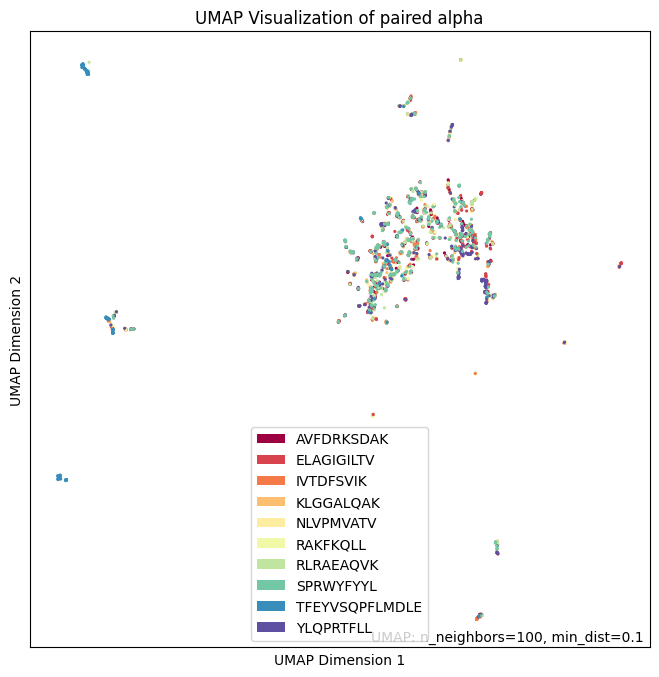

In [ ]:
paired_dist_matrix_alpha = calculate_paired_dist_and_umap(df = paired_balance, chain = "alpha", gene = "antigen.epitope")

In [ ]:
paired_dist_matrix_alpha.head()

,complex.id,0,1,2,3,4,5,6,7,8,...,4389,4390,4391,4392,4393,4394,4395,4396,4397,antigen.epitope
0,14,0,32,11,28,22,20,24,26,21,...,32,32,32,32,32,32,36,32,32,ELAGIGILTV
1,15,32,0,35,8,28,32,34,36,35,...,8,8,8,8,8,8,39,8,8,ELAGIGILTV
2,16,11,35,0,35,22,14,24,21,27,...,36,36,36,36,36,36,36,36,36,ELAGIGILTV
3,17,28,8,35,0,32,28,34,35,31,...,7,7,7,7,7,7,39,7,7,ELAGIGILTV
4,18,22,28,22,32,0,24,28,28,28,...,32,32,32,32,32,32,39,32,32,ELAGIGILTV


**Reducing the dimension of paired alpha  and beta distance matrics**

In [ ]:
# paired_dist_matrix_alpha.shape
ids = paired_dist_matrix_alpha["complex.id"]

In [ ]:
ids = paired_dist_matrix_alpha["complex.id"]
distances_reduced_alpha = umap.UMAP(n_components = 50, n_neighbors = 100).fit(paired_dist_matrix_alpha.iloc[:, 1:-1].values)
distances_reduced_beta = umap.UMAP(n_components = 50, n_neighbors = 100).fit(paired_dist_matrix_beta.iloc[:, 1:-1].values)



**Concatinating  the reduced alpha and beta distance matrix**

In [ ]:
distance_reduced_alpha_beta = pd.concat([
    ids,
    pd.DataFrame(distances_reduced_alpha.embedding_),
    pd.DataFrame(distances_reduced_beta.embedding_)
    ], axis = 1)
distance_reduced_alpha_beta

,complex.id,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,14,0.086340,3.156183,7.386783,3.261829,2.449860,3.790882,2.201603,9.325050,0.478906,...,7.859126,2.682922,6.164040,6.951561,4.989886,4.660789,4.068678,2.206894,5.866987,5.668756
1,15,6.462800,-0.619924,8.540486,3.234864,3.020340,2.286374,0.003384,-2.300761,2.252008,...,7.803400,2.760945,6.267142,7.077920,4.920766,4.955097,4.549394,2.348074,5.949512,5.596759
2,16,0.024520,3.083785,7.448237,3.231690,1.521753,4.934113,2.994906,11.298135,0.912247,...,7.816997,2.753905,6.197796,7.000577,4.928218,4.746814,4.406483,2.459304,6.030547,5.534593
3,17,6.447553,-0.669134,8.434069,3.236750,3.030910,2.272357,-0.007192,-2.225158,2.261492,...,7.735434,2.759823,6.134546,6.967456,4.998495,4.697799,4.326203,2.453457,6.039087,5.363232
4,18,-1.326788,3.546790,6.919200,4.408955,17.077345,14.377211,5.455253,3.322622,2.036114,...,7.827041,2.746398,6.201925,6.991741,4.925206,4.761866,4.408553,2.445835,6.041722,5.557890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,30524,26.412956,-12.090264,18.723600,2.499491,2.996581,3.842115,2.771012,4.713696,0.934973,...,7.567589,2.858747,5.986121,6.841088,4.998534,4.688888,4.874763,2.661218,6.108835,5.973678
4394,30525,26.530533,-12.122297,18.812632,2.201217,2.876681,3.758928,2.745218,4.656554,0.929629,...,7.650830,3.101296,5.911296,6.855183,5.117864,4.718468,4.897847,2.503055,5.953817,5.732316
4395,30526,1.215387,2.638332,7.448515,3.200263,2.066404,3.345891,1.581509,5.613517,1.607160,...,7.638175,3.086933,5.923286,6.867959,5.089757,4.703201,4.886917,2.496616,5.990086,5.770422
4396,30527,14.344044,-2.302417,-18.428146,3.253535,2.086850,5.209576,1.282682,7.462945,-0.674094,...,7.874995,2.653733,5.755812,6.940031,5.087589,4.926664,4.558114,2.673151,5.968492,5.755225


**Replacing the alpha beta chains with distance matrices in paired dataframe**

In [ ]:

paired_transformed = pd.merge(
    paired_balance[['complex.id', 'mhc.a', 'mhc.b', 'antigen.species','antigen.epitope']],
    distance_reduced_alpha_beta,
    on = "complex.id"
    )
paired_transformed.head()

,complex.id,mhc.a,mhc.b,antigen.species,antigen.epitope,0,1,2,3,4,...,40,41,42,43,44,45,46,47,48,49
0,2819,HLA-A*03:01,B2M,CMV,KLGGALQAK,21.268099,20.720810,9.219832,-17.015511,2.895174,...,7.795185,2.704161,6.180250,6.931039,4.962894,4.688658,4.051680,2.194492,5.926770,5.568431
1,2820,HLA-A*03:01,B2M,CMV,KLGGALQAK,1.504217,2.550396,7.441062,3.248323,2.494190,...,7.792696,2.690570,6.128206,6.913563,5.016384,4.694779,4.126103,2.245603,5.934491,5.571445
2,2823,HLA-A*03:01,B2M,CMV,KLGGALQAK,0.142975,2.921373,7.416218,3.216877,1.120115,...,7.824733,2.794082,6.184233,7.015878,4.962662,4.824215,4.517016,2.443179,6.000861,5.624202
3,2825,HLA-A*03:01,B2M,CMV,KLGGALQAK,2.090719,2.241832,7.488379,3.236368,2.766428,...,7.831428,2.781755,6.198267,7.098158,4.880069,4.591535,4.419058,2.563461,5.970734,5.462231
4,2827,HLA-A*03:01,B2M,CMV,KLGGALQAK,-0.061183,2.930282,7.375878,3.279761,0.786007,...,7.795009,2.737610,6.238471,7.060836,4.941050,4.932383,4.526417,2.315011,5.946984,5.584370


In [ ]:
# paired_transformed.to_csv("paired_transformed.csv", index = False)
# paired_transformed = pd.read_csv("paired_transformed.csv")
#paired_transformed.head()

**Transform the mhc. mhc.b and antigen.species columns into numerical form**

In [ ]:
paired_transformed["mhc.a"].nunique()

12

In [ ]:
paired_transformed["mhc.b"].nunique()

2

In [ ]:
paired_transformed["antigen.species"].nunique()

5

In [ ]:
mhca_dummies = pd.get_dummies(paired_transformed[".mhca"])
mhcb_dummies = pd.get_dummies(paired_transformed["mhc.b"])
antigen_species_dummies = pd.get_dummies(paired_transformed["antigen.species"])

In [ ]:
paired_transformed_dummies = pd.concat([
    paired_transformed.drop(["mhc.a", "mhc.b", "antigen.species"], axis = 1),
    mhca_dummies,
    mhcb_dummies,
    antigen_species_dummies
], axis = 1)
paired_transformed_dummies.head()

,complex.id,antigen.epitope,0,1,2,3,4,5,6,7,...,HLA-B*07:02,HLA-B*08:01,HLA-DPA*01:03,B2M,HLA-DPB*04:01,CMV,EBV,HomoSapiens,InfluenzaA,SARS-CoV-2
0,2819,KLGGALQAK,21.268099,20.720810,9.219832,-17.015510,2.895174,1.895120,0.851459,-3.974042,...,0,0,0,1,0,1,0,0,0,0
1,2820,KLGGALQAK,1.504217,2.550396,7.441063,3.248323,2.494191,2.788352,1.003171,4.927639,...,0,0,0,1,0,1,0,0,0,0
2,2823,KLGGALQAK,0.142975,2.921373,7.416218,3.216877,1.120115,4.124504,3.471717,10.474129,...,0,0,0,1,0,1,0,0,0,0
3,2825,KLGGALQAK,2.090719,2.241832,7.488379,3.236368,2.766428,2.517874,0.512078,3.175678,...,0,0,0,1,0,1,0,0,0,0
4,2827,KLGGALQAK,-0.061183,2.930282,7.375878,3.279761,0.786007,4.158451,3.912607,11.445698,...,0,0,0,1,0,1,0,0,0,0


## Model Training


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



In [ ]:
X = paired_transformed_dummies.drop(["complex.id","antigen.epitope"], axis = 1)
y = paired_transformed_dummies["antigen.epitope"]

In [ ]:
le = LabelEncoder()
y_tranformed = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_tranformed, test_size=0.2, random_state=42)
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")

X_train.shape: (3518, 119)
X_test.shape: (880, 119)


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)
# y_pred


In [ ]:
cr = classification_report(y_true=y_test, y_pred = y_pred, target_names=le.classes_)
print(cr)

                precision    recall  f1-score   support

    AVFDRKSDAK       0.67      0.70      0.68        93
    ELAGIGILTV       1.00      0.99      0.99        78
     GILGFVFTL       0.99      1.00      0.99        82
     IVTDFSVIK       0.63      0.60      0.62        80
     KLGGALQAK       1.00      1.00      1.00        87
     NLVPMVATV       1.00      1.00      1.00        89
      RAKFKQLL       1.00      1.00      1.00        83
     RLRAEAQVK       1.00      1.00      1.00        67
     SPRWYFYYL       1.00      1.00      1.00        64
TFEYVSQPFLMDLE       1.00      1.00      1.00        70
     YLQPRTFLL       1.00      1.00      1.00        87

      accuracy                           0.93       880
     macro avg       0.94      0.94      0.94       880
  weighted avg       0.93      0.93      0.93       880



In [ ]:
# rfc.feature_importances_

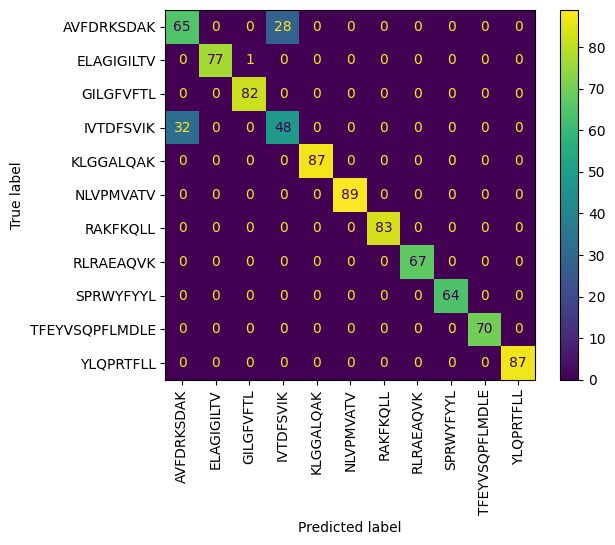

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=le.classes_
    )

disp.plot()
plt.xticks(rotation = 90)
plt.show()